<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/SlopesFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import

**3 Classes**
* (1) normal        22980
* (0) rapid         16337
* (2) prevention    13303

## BI3

In [2]:
import pandas as pd
bi3 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /binary_3_Group_5_Fold.xlsx')
bi3 = bi3.iloc[:, 1:]
bi3

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,newL25:Parathyroid hormone,newL26:Vitamin D,newL27:UrineAlbumin/Cr ratio,newL28:UrineProtein/Cr ratio,newL29:UrineVolume (24hrs),newL30:UrineUrea (24hrs),newL31:UrineSodium (24hrs),newL32:UrineProtein (24hrs),Group,Fold
0,2299,6947220,-12.812245,35,0,1,35,0,0,0,...,1,1,1,1,1,1,1,1,rapid,1
1,2299,3386255,-7.158596,90,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,rapid,1
2,2299,5812902,-6.063710,100,100,34,0,0,0,0,...,1,1,1,1,1,1,1,1,rapid,1
3,2299,4546471,5.550691,90,90,0,0,0,0,0,...,1,1,1,1,1,1,1,1,normal,1
4,2299,8186767,28.287500,100,0,15,0,0,0,0,...,1,1,1,1,1,1,1,1,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,100,100,0,0,0,0,0,...,1,1,0,0,1,1,1,1,prevention,4
52616,3319971,9270331,-0.692078,0,100,0,0,0,0,0,...,1,1,0,0,1,1,1,1,normal,0
52617,3320048,9242721,7.217875,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,normal,1
52618,3320050,9257281,-32.794557,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,rapid,2


In [3]:
bi3['NATNL'] = bi3['NATNL'].replace({0: 'Asian', 1: 'Asian', 3: 'Asian', 2: 'Non-Asian'})

In [4]:
bi3 = bi3.sort_values(['PatientUID', 'PatientVisitUID'])
bi3['TimeDiff'] = bi3.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
bi3['TimeDiff'] = bi3['TimeDiff'].fillna(0)

In [5]:
bi3['time_t1'] = pd.to_datetime(bi3['time_t1'])

In [6]:
columns_to_encode = ['VisitLocation', 'Group', 'NATNL']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(bi3[column].unique())}
    bi3[column] = bi3[column].map(encoding_map)

## MF3

In [7]:
import pandas as pd
data3 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /df_3_Group_5_Fold.xlsx')
data3 = data3.iloc[:, 1:]
data3

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,StartDTTM,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Group,Fold
0,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,2019-12-19 08:19:38.647,...,89.00,5.562,205.00,69.00,139.00,76.00,36.916,1,rapid,1
1,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,2016-08-15 08:13:26.043,...,91.00,5.284,215.00,81.00,123.00,99.00,21.019,1,rapid,1
2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,2018-12-12 07:58:57.190,...,100.00,5.300,193.00,62.00,129.00,65.00,30.879,1,rapid,1
3,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,2017-10-03 07:37:22.777,...,86.00,5.755,219.00,64.00,146.00,73.00,15.198,1,normal,1
4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:54.580,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,2021-03-04 07:55:40.703,...,88.00,5.500,198.00,74.00,129.00,60.00,28.684,1,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,0,1,0,2023-04-04 08:28:58.833,33.68,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:31.910,...,103.00,5.900,165.00,311.00,84.00,43.00,131.300,1,prevention,4
52616,3319971,9270331,-0.692078,0,1,0,2023-04-04 08:49:20.047,26.47,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:53.720,...,99.00,7.100,154.00,196.00,83.00,42.00,325.800,1,normal,0
52617,3320048,9242721,7.217875,0,0,1,2023-04-10 08:36:15.217,70.36,OPD AE-DV191,2022-03-05 12:36:33.263,...,123.99,6.457,112.00,96.00,64.00,33.00,104.371,1,normal,1
52618,3320050,9257281,-32.794557,0,1,0,2023-04-10 08:58:57.267,30.69,หน่วยคลินิกเฉพาะทางศูนย์บริการทางการแพทย์ชั้นเลิศ,2022-03-10 07:42:44.243,...,96.00,5.715,202.31,93.29,136.63,67.35,27.246,1,rapid,2


In [8]:
data3['NATNL'] = data3['NATNL'].replace({0: 'Asian', 1: 'Asian', 3: 'Asian', 2: 'Non-Asian'})

In [9]:
data3 = data3.sort_values(['PatientUID', 'PatientVisitUID'])
data3['TimeDiff'] = data3.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
data3['TimeDiff'] = data3['TimeDiff'].fillna(0)

In [10]:
data3['time_t1'] = pd.to_datetime(data3['time_t1'])

In [11]:
columns_to_encode = ['VisitLocation', 'Group', 'NATNL']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(data3[column].unique())}
    data3[column] = data3[column].map(encoding_map)

# Stage

In [12]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตามระดับ 'eGFR'
def categorize_eGFR(eGFR_value):
    if eGFR_value >= 90:
        return 0
    elif 89.99 >= eGFR_value >= 60:
        return 1
    elif 59.99 >= eGFR_value >= 30:
        return 2
    elif 29.99 >= eGFR_value >= 15:
        return 3
    else:
        return 4

bi3['Stage'] = bi3['eGFR_t1'].apply(categorize_eGFR)
data3['Stage'] = data3['eGFR_t1'].apply(categorize_eGFR)

In [13]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 7.8 MB/s eta 0:00:00


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
import shap
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [18]:
!pip install scikeras

In [19]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Model

## binary3

In [ ]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
X = bi3.drop(['PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                'LabCwhen', 'LabLocation', 'Fold', 'Slopes'], axis=1)
y = bi3['Slopes']
all_folds = bi3['Fold'].unique()
X_train_scaled_list_bi3 = []
y_train_list_bi3 = []
X_test_scaled_list_bi3 = []
y_test_list_bi3 = []
for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    val_fold = all_folds[test_fold][0]
    train_indices = bi3['Fold'].isin(train_folds)
    test_indices = bi3['Fold'] == val_fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_train_scaled_list_bi3.append(X_train_scaled)
    y_train_list_bi3.append(y_train)
    X_test_scaled_list_bi3.append(X_test_scaled)
    y_test_list_bi3.append(y_test)
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
        zip(X_train_scaled_list_bi3, y_train_list_bi3, X_test_scaled_list_bi3, y_test_list_bi3, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices
    #print(f"Training set size: {X_train_scaled_fold.shape}")
    #print(f"Test set size: {X_test_scaled_fold.shape}")
    #print(f"Folds in training set: {train_folds.tolist()}")
    #print(f"Folds in test set: {test_fold}")
    #print("---\n")


327/327 [==============================] - 1s 2ms/step

Fold 1 :
Mean Squared Error: 20.2869
Mean Absolute Error: 2.8283
R-squared: 0.7917


<ipython-input-20-074b774c90c4>:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')  # Choose a colormap (you can use other colormaps)


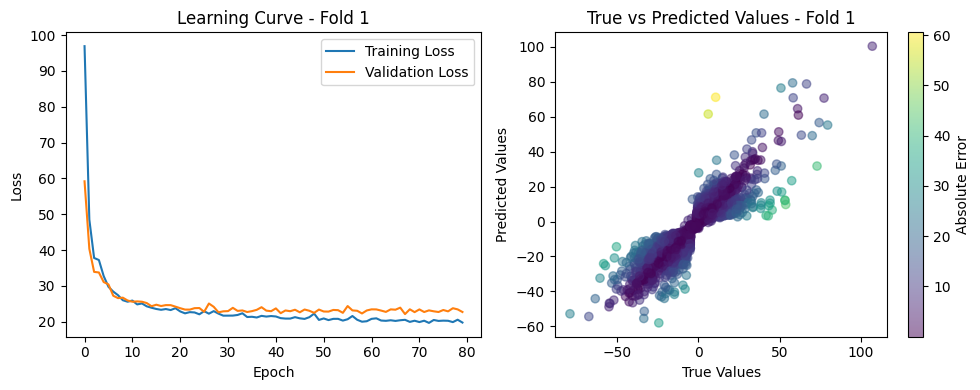

333/333 [==============================] - 1s 2ms/step

Fold 2 :
Mean Squared Error: 21.4802
Mean Absolute Error: 2.9069
R-squared: 0.7846


<ipython-input-20-074b774c90c4>:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')  # Choose a colormap (you can use other colormaps)


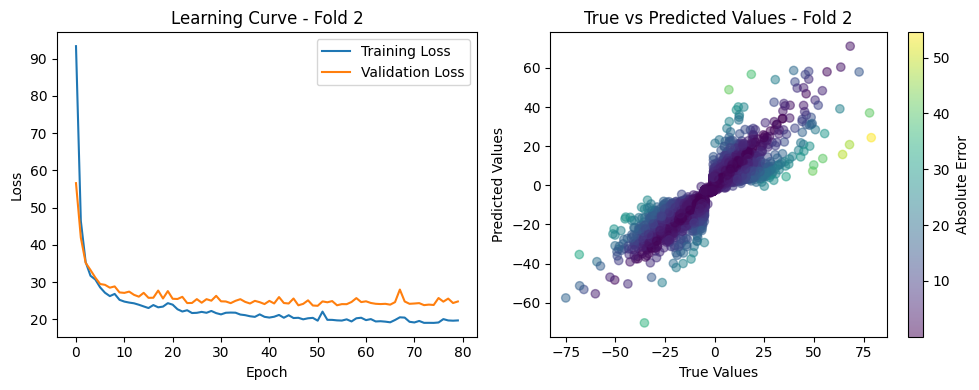

324/324 [==============================] - 1s 2ms/step

Fold 3 :
Mean Squared Error: 19.1932
Mean Absolute Error: 2.8475
R-squared: 0.8072


<ipython-input-20-074b774c90c4>:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')  # Choose a colormap (you can use other colormaps)


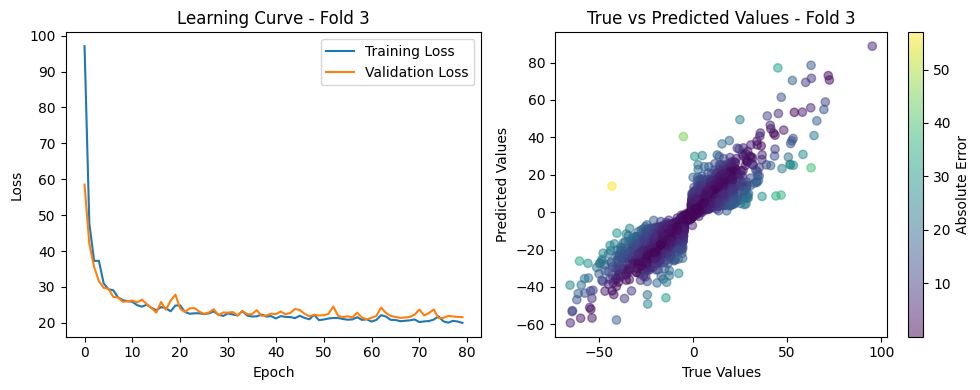

332/332 [==============================] - 1s 3ms/step

Fold 4 :
Mean Squared Error: 27.0203
Mean Absolute Error: 2.8876
R-squared: 0.6948


<ipython-input-20-074b774c90c4>:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')  # Choose a colormap (you can use other colormaps)


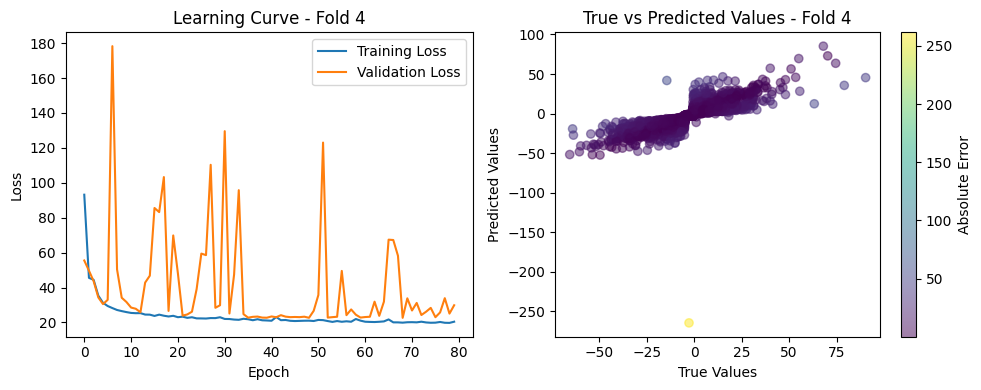

332/332 [==============================] - 1s 2ms/step

Fold 5 :
Mean Squared Error: 5973.8414
Mean Absolute Error: 3.5992
R-squared: -62.7753


<ipython-input-20-074b774c90c4>:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')  # Choose a colormap (you can use other colormaps)


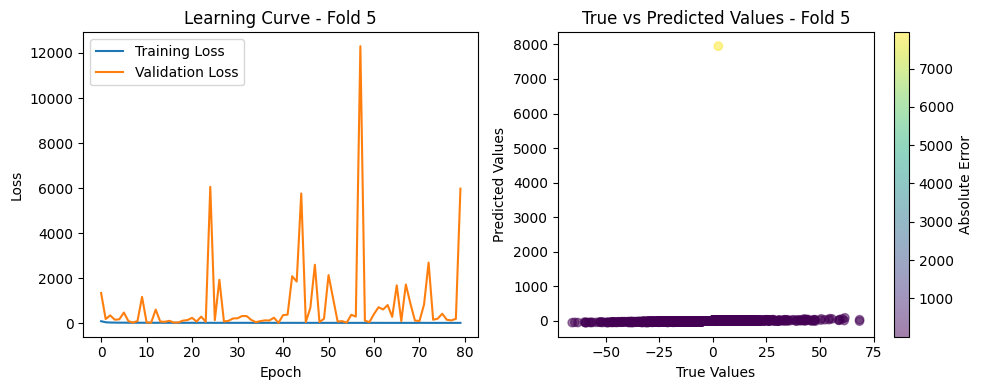

Mean Squared Error: 1212.3644
Mean Absolute Error: 3.0139
Mean R-squared: -11.9394


In [20]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)

binary3_mse_scores = []
binary3_mae_scores = []
binary3_r2_scores = []

# Loop through each fold
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
        zip(X_train_scaled_list_bi3, y_train_list_bi3, X_test_scaled_list_bi3, y_test_list_bi3, kf.split(all_folds))
):
    model = Sequential()
    model.add(Dense(512, input_dim=X_train_scaled_fold.shape[1], activation='linear', kernel_regularizer='l1'))
    model.add(Dense(256, activation='relu', kernel_regularizer='l1'))
    model.add(Dense(128, activation='relu', kernel_regularizer='l1'))
    model.add(Dense(64, activation='relu', kernel_regularizer='l1'))
    model.add(Dense(1, activation='linear'))
    optimizer = Adam(learning_rate=0.001) # Reduced learning rate
    model.compile(loss="mean_squared_error", optimizer=optimizer)

    # Train the model
    history = model.fit(X_train_scaled_fold, y_train_fold, epochs=80, batch_size=64, verbose=0, validation_data=(X_test_scaled_fold, y_test_fold))

    # Predict on the test set
    y_pred = model.predict(X_test_scaled_fold)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test_fold, y_pred)
    mae = mean_absolute_error(y_test_fold, y_pred)
    r2 = r2_score(y_test_fold, y_pred)

    # Print evaluation metrics for each fold
    print(f"\nFold {fold + 1} :")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")

    binary3_mse_scores.append(mse)
    binary3_mae_scores.append(mae)
    binary3_r2_scores.append(r2)

    # Plot training and validation loss
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Learning Curve - Fold {}".format(fold + 1))
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Calculate absolute errors
    absolute_errors = abs(np.ravel(y_test_fold) - np.ravel(y_pred))

    # Define a color map based on absolute errors
    cmap = plt.cm.get_cmap('viridis')  # Choose a colormap (you can use other colormaps)

    # Plot true data vs predicted data with custom colors
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(y_test_fold, y_pred, c=absolute_errors, cmap=cmap, alpha=0.5)
    plt.title("True vs Predicted Values - Fold {}".format(fold + 1))
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.colorbar(scatter, label='Absolute Error')  # Add a colorbar for reference
    plt.tight_layout()
    plt.show()

binary3_mean_mse = sum(binary3_mse_scores) / num_folds
binary3_mean_mae = sum(binary3_mae_scores) / num_folds
binary3_mean_r2 = sum(binary3_r2_scores) / num_folds

print(f"Mean Squared Error: {binary3_mean_mse:.4f}")
print(f"Mean Absolute Error: {binary3_mean_mae:.4f}")
print(f"Mean R-squared: {binary3_mean_r2:.4f}")


#### **shap**

In [22]:
explainer = shap.KernelExplainer(model=model.predict, data=X_train_scaled.head(50), link="identity")

2/2 [==============================] - 0s 5ms/step


In [23]:
X_train_scaled.iloc[0:50, :].columns

Index(['G1M2:ARB', 'G3M1:Statin', 'G5M2:NSAIDs', 'G1M5:Diuretic',
       'G1M7:Beta blocker', 'G1M3:Dihydropyridine CCB', 'G1M6:MRA',
       'G1M1:ACEI', 'G2M2:Metformin', 'G2M3:DPP4 inhibitor',
       ...
       'newL26:Vitamin D', 'newL27:UrineAlbumin/Cr ratio',
       'newL28:UrineProtein/Cr ratio', 'newL29:UrineVolume (24hrs)',
       'newL30:UrineUrea (24hrs)', 'newL31:UrineSodium (24hrs)',
       'newL32:UrineProtein (24hrs)', 'Group', 'TimeDiff', 'Stage'],
      dtype='object', length=122)

In [24]:
import ipywidgets as widgets

In [25]:
shap_values = explainer.shap_values(X=X_train_scaled.iloc[0:50, :], nsamples=100)

  0%|          | 0/50 [00:00<?, ?it/s]

157/157 [==============================] - 0s 2ms/step


In [26]:
print("Shape of shap_values:", shap_values.shape)
print("Shape of X_train_scaled:", X_train_scaled.shape)


Shape of shap_values: (50, 122, 1)
Shape of X_train_scaled: (42017, 122)


In [27]:
shap_values_reshaped = shap_values.reshape(50, 122)

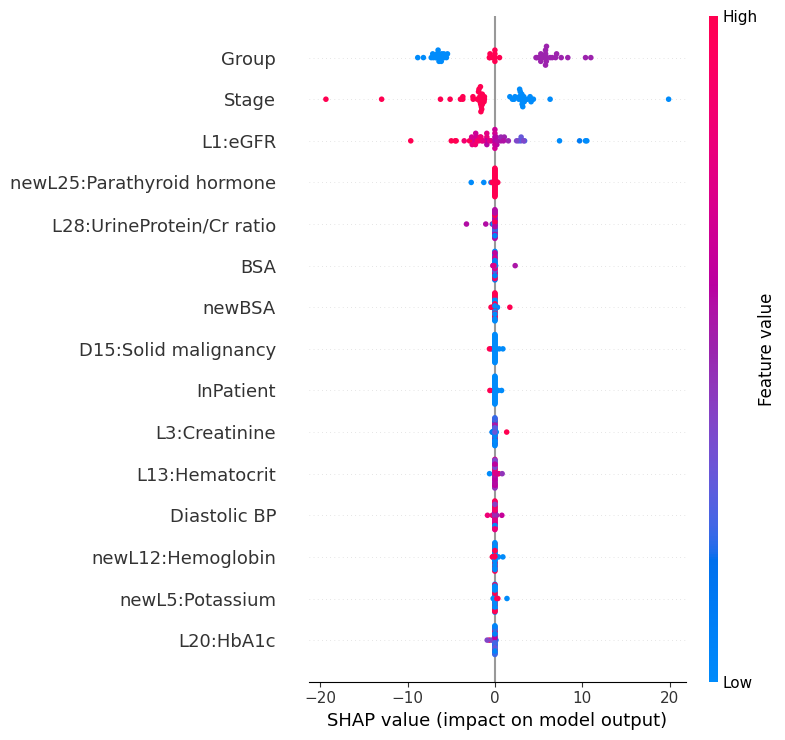

In [28]:
shap.summary_plot(shap_values_reshaped, features=X_train_scaled.iloc[0:50, :], max_display=15)

In [29]:
# Check the dimensions of the features and SHAP values
print("Number of features:", len(X_train_scaled.columns))
print("Shape of SHAP values array:", shap_values_reshaped.shape)


Number of features: 122
Shape of SHAP values array: (50, 122)


In [30]:
# Compute SHAP values for all 50 instances
shap_values = explainer.shap_values(X_train_scaled.iloc[0:50, :], nsamples=100)

  0%|          | 0/50 [00:00<?, ?it/s]

157/157 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=1.913e-02, with an active set of 8 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 13 iterations, i.e. alpha=9.485e-03, with an active set of 13 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:678: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 21 iterations, alpha=5.884e-03, previous alpha=4.956e-03, with an

157/157 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 57 iterations, i.e. alpha=6.717e-04, with an active set of 43 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:678: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 78 iterations, alpha=1.950e-04, previous alpha=1.950e-04, with an active set of 49 regressors.
  warnings.warn(


In [31]:
import shap
shap.initjs()

# Reshape the SHAP values if necessary
shap_values_reshaped = shap_values.reshape(50, -1)
# Choose the instance index for which you want to plot the force
instance_index = 0

# Plot the force for the specified instance
shap.force_plot(
    explainer.expected_value,
    shap_values_reshaped[instance_index],
    features=X_train_scaled.iloc[instance_index],
    feature_names=X_train_scaled.columns
)

In [32]:
import shap
import numpy as np

X_idx = 0
shap_values_single = explainer.shap_values(X=X_train_scaled.iloc[X_idx:X_idx + 1, :], nsamples=100)

# Reshape SHAP values to remove extra dimension
shap_values_single = np.squeeze(shap_values_single)
print("Shape of SHAP values for single sample after reshaping:", shap_values_single.shape)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_single, X_train_scaled.iloc[X_idx:X_idx + 1, :])


  0%|          | 0/1 [00:00<?, ?it/s]

157/157 [==============================] - 0s 2ms/step
Shape of SHAP values for single sample after reshaping: (122,)


In [33]:
X_idx = 0
sample = X_train.iloc[X_idx:X_idx + 1, :]
explanation = shap.Explanation(values=shap_values_single, base_values=explainer.expected_value, data=sample)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_single, sample)

##data3

In [35]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
X = data3.drop(['PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                'LabCwhen', 'LabLocation', 'Fold', 'Slopes'], axis=1)
y = data3['Slopes']
all_folds = data3['Fold'].unique()
X_train_scaled_list_data3 = []
y_train_list_data3 = []
X_test_scaled_list_data3 = []
y_test_list_data3 = []
for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    val_fold = all_folds[test_fold][0]
    train_indices = data3['Fold'].isin(train_folds)
    test_indices = data3['Fold'] == val_fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_train_scaled_list_data3.append(X_train_scaled)
    y_train_list_data3.append(y_train)
    X_test_scaled_list_data3.append(X_test_scaled)
    y_test_list_data3.append(y_test)
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
        zip(X_train_scaled_list_data3, y_train_list_data3, X_test_scaled_list_data3, y_test_list_data3, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices
    print(f"Training set size: {X_train_scaled_fold.shape}")
    print(f"Test set size: {X_test_scaled_fold.shape}")
    print(f"Folds in training set: {train_folds.tolist()}")
    print(f"Folds in test set: {test_fold}")
    print("---\n")


Training set size: (42274, 76)
Test set size: (10346, 76)
Folds in training set: [0, 1, 2, 3]
Folds in test set: [4]
---

Training set size: (41978, 76)
Test set size: (10642, 76)
Folds in training set: [1, 2, 3, 4]
Folds in test set: [0]
---

Training set size: (42017, 76)
Test set size: (10603, 76)
Folds in training set: [0, 1, 3, 4]
Folds in test set: [2]
---

Training set size: (42184, 76)
Test set size: (10436, 76)
Folds in training set: [0, 1, 2, 4]
Folds in test set: [3]
---

Training set size: (42027, 76)
Test set size: (10593, 76)
Folds in training set: [0, 2, 3, 4]
Folds in test set: [1]
---



324/324 [==============================] - 1s 2ms/step

Fold 1 :
Mean Squared Error: 18.5796
Mean Absolute Error: 2.8038
R-squared: 0.8134


<ipython-input-36-b6e176bd21ea>:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')  # Choose a colormap (you can use other colormaps)


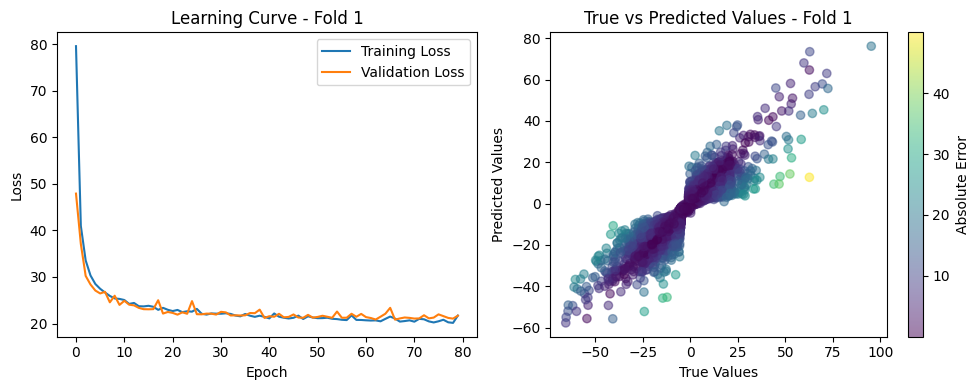

333/333 [==============================] - 1s 2ms/step

Fold 2 :
Mean Squared Error: 20.9856
Mean Absolute Error: 2.8800
R-squared: 0.7895


<ipython-input-36-b6e176bd21ea>:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')  # Choose a colormap (you can use other colormaps)


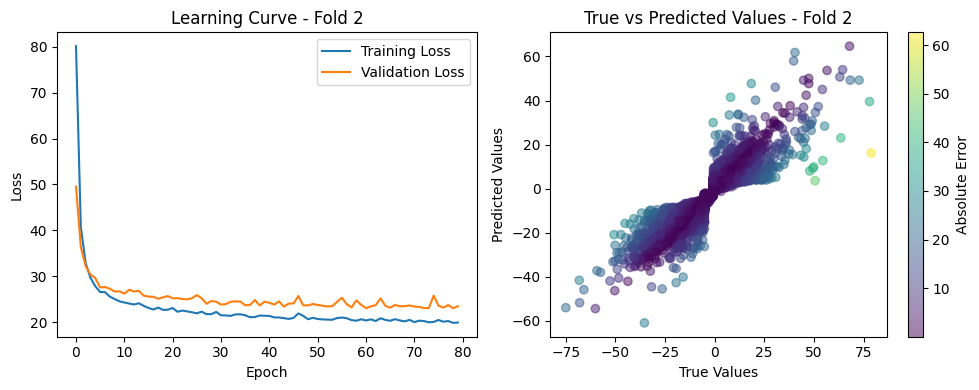

332/332 [==============================] - 1s 2ms/step

Fold 3 :
Mean Squared Error: 18.3249
Mean Absolute Error: 2.7854
R-squared: 0.8044


<ipython-input-36-b6e176bd21ea>:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')  # Choose a colormap (you can use other colormaps)


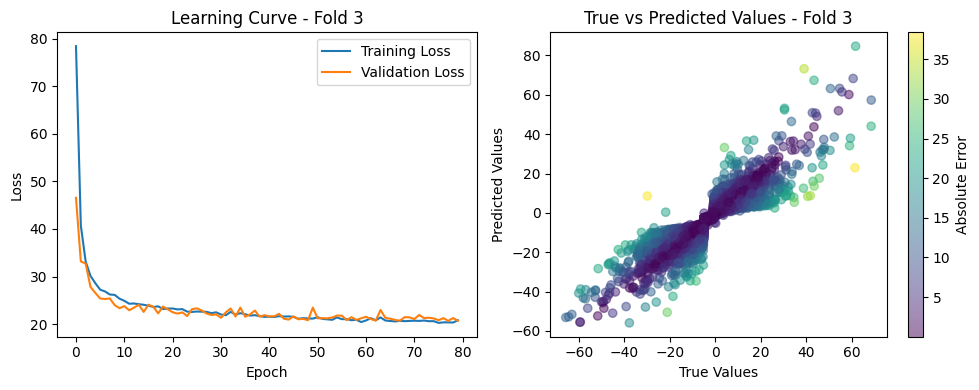

327/327 [==============================] - 1s 2ms/step

Fold 4 :
Mean Squared Error: 19.8166
Mean Absolute Error: 2.8215
R-squared: 0.7966


<ipython-input-36-b6e176bd21ea>:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')  # Choose a colormap (you can use other colormaps)


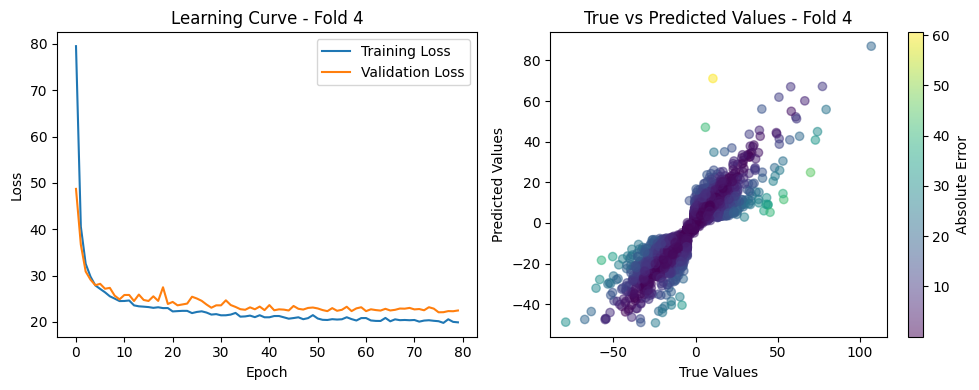

332/332 [==============================] - 1s 2ms/step

Fold 5 :
Mean Squared Error: 19.4324
Mean Absolute Error: 2.8268
R-squared: 0.7805


<ipython-input-36-b6e176bd21ea>:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')  # Choose a colormap (you can use other colormaps)


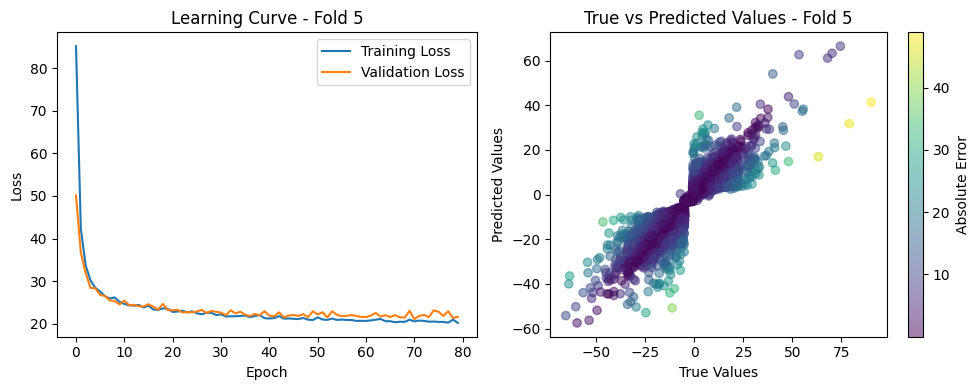


Overall Mean Evaluation Metrics:
Mean Squared Error: 19.4278
Mean Absolute Error: 2.8235
Mean R-squared: 0.7969


In [36]:
import shap

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)

data3_mse_scores = []
data3_mae_scores = []
data3_r2_scores = []


# Loop through each fold
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
        zip(X_train_scaled_list_data3, y_train_list_data3, X_test_scaled_list_data3, y_test_list_data3, kf.split(all_folds))
):
    model2 = Sequential()
    model2.add(Dense(512, input_dim=X_train_scaled_fold.shape[1], activation='linear', kernel_regularizer='l1'))
    model2.add(Dense(256, activation='relu', kernel_regularizer='l1'))
    model2.add(Dense(128, activation='relu', kernel_regularizer='l1'))
    model2.add(Dense(64, activation='relu', kernel_regularizer='l1'))
    model2.add(Dense(1, activation='linear'))
    optimizer = Adam(learning_rate=0.001) # Reduced learning rate
    model2.compile(loss="mean_squared_error", optimizer=optimizer)

    # Train the model
    history = model2.fit(X_train_scaled_fold, y_train_fold, epochs=80, batch_size=64, verbose=0, validation_data=(X_test_scaled_fold, y_test_fold))

    # Predict on the test set
    y_pred = model2.predict(X_test_scaled_fold)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test_fold, y_pred)
    mae = mean_absolute_error(y_test_fold, y_pred)
    r2 = r2_score(y_test_fold, y_pred)

    # Print evaluation metrics for each fold
    print(f"\nFold {fold + 1} :")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")

    data3_mse_scores.append(mse)
    data3_mae_scores.append(mae)
    data3_r2_scores.append(r2)

    # Plot training and validation loss
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Learning Curve - Fold {}".format(fold + 1))
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Calculate absolute errors
    absolute_errors = abs(np.ravel(y_test_fold) - np.ravel(y_pred))

    # Define a color map based on absolute errors
    cmap = plt.cm.get_cmap('viridis')  # Choose a colormap (you can use other colormaps)

    # Plot true data vs predicted data with custom colors
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(y_test_fold, y_pred, c=absolute_errors, cmap=cmap, alpha=0.5)
    plt.title("True vs Predicted Values - Fold {}".format(fold + 1))
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.colorbar(scatter, label='Absolute Error')  # Add a colorbar for reference
    plt.tight_layout()
    plt.show()

# Print mean scores across all folds
data3_mean_mse = sum(data3_mse_scores) / num_folds
data3_mean_mae = sum(data3_mae_scores) / num_folds
data3_mean_r2 = sum(data3_r2_scores) / num_folds

print(f"\nOverall Mean Evaluation Metrics:")
print(f"Mean Squared Error: {data3_mean_mse:.4f}")
print(f"Mean Absolute Error: {data3_mean_mae:.4f}")
print(f"Mean R-squared: {data3_mean_r2:.4f}")


#### **shap**

In [37]:
explainer = shap.KernelExplainer(model=model2.predict, data=X_train_scaled.head(50), link="identity")

2/2 [==============================] - 0s 5ms/step


In [38]:
import ipywidgets as widgets

In [39]:
shap_values = explainer.shap_values(X=X_train_scaled.iloc[0:50, :], nsamples=100)

  0%|          | 0/50 [00:00<?, ?it/s]

157/157 [==============================] - 0s 2ms/step


In [40]:
print("Shape of shap_values:", shap_values.shape)
print("Shape of X_train_scaled:", X_train_scaled.shape)

Shape of shap_values: (50, 76, 1)
Shape of X_train_scaled: (42027, 76)


In [41]:
shap_values_reshaped = shap_values.reshape(50, 76)

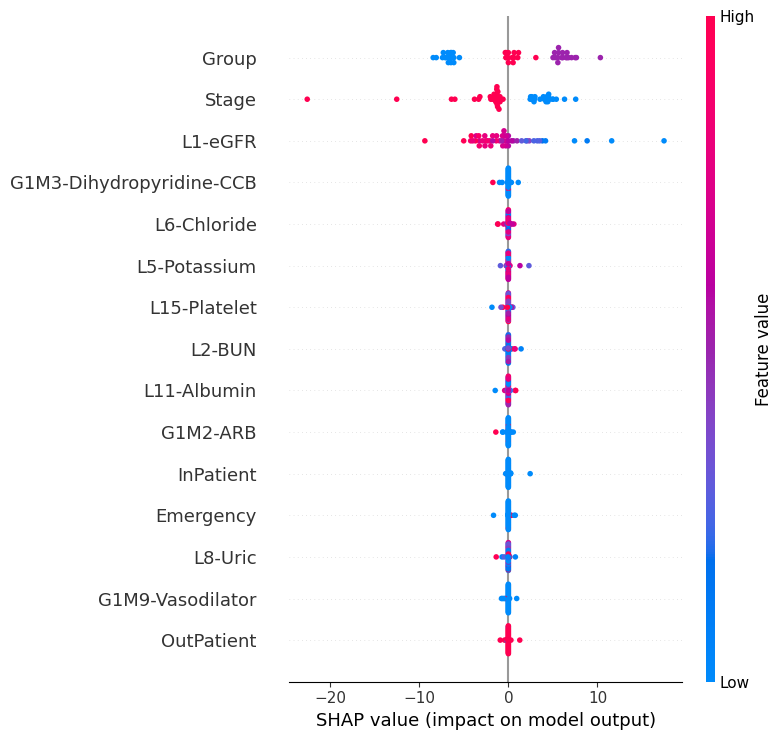

In [42]:
shap.summary_plot(shap_values_reshaped, features=X_train_scaled.iloc[0:50, :], max_display=15)

In [43]:
# Check the dimensions of the features and SHAP values
print("Number of features:", len(X_train_scaled.columns))
print("Shape of SHAP values array:", shap_values_reshaped.shape)


Number of features: 76
Shape of SHAP values array: (50, 76)


In [44]:
# Compute SHAP values for all 50 instances
shap_values = explainer.shap_values(X_train_scaled.iloc[0:50, :], nsamples=100)

  0%|          | 0/50 [00:00<?, ?it/s]

157/157 [==============================] - 0s 2ms/step


In [45]:
import shap
import numpy as np

X_idx = 0
shap_values_single = explainer.shap_values(X=X_train_scaled.iloc[X_idx:X_idx + 1, :], nsamples=100)

# Reshape SHAP values to remove extra dimension
shap_values_single = np.squeeze(shap_values_single)
print("Shape of SHAP values for single sample after reshaping:", shap_values_single.shape)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_single, X_train_scaled.iloc[X_idx:X_idx + 1, :])


  0%|          | 0/1 [00:00<?, ?it/s]

157/157 [==============================] - 0s 2ms/step
Shape of SHAP values for single sample after reshaping: (76,)


In [46]:
import shap
import numpy as np

X_idx = 0
shap_values_single = explainer.shap_values(X=X_train.iloc[X_idx:X_idx + 1, :], nsamples=100)

# Reshape SHAP values to remove extra dimension
shap_values_single = np.squeeze(shap_values_single)
print("Shape of SHAP values for single sample after reshaping:", shap_values_single.shape)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_single, X_train.iloc[X_idx:X_idx + 1, :])


  0%|          | 0/1 [00:00<?, ?it/s]

157/157 [==============================] - 0s 3ms/step
Shape of SHAP values for single sample after reshaping: (76,)


# สรุป Data3 ดีกว่า

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data3_df = pd.DataFrame({
    'Fold': list(range(1, 6)),
    'MSE': data3_mse_scores,
    'MAE': data3_mae_scores,
    'R2': data3_r2_scores
})

bi3_df = pd.DataFrame({
    'Fold': list(range(1, 6)),
    'MSE': binary3_mse_scores,
    'MAE': binary3_mae_scores,
    'R2': binary3_r2_scores
})

merged_df = pd.merge(data3_df, bi3_df, on='Fold', suffixes=('_data3', '_bi3'))
best_data3_fold = merged_df.loc[merged_df['MSE_data3'].idxmin()]
best_bi3_fold = merged_df.loc[merged_df['MSE_bi3'].idxmin()]

comparison_table = pd.DataFrame({
    'Best_Fold': [best_data3_fold['Fold'], best_bi3_fold['Fold']],
    'Best_MSE': [best_data3_fold['MSE_data3'], best_bi3_fold['MSE_bi3']],
    'Best_MAE': [best_data3_fold['MAE_data3'], best_bi3_fold['MAE_bi3']],
    'Best_R2': [best_data3_fold['R2_data3'], best_bi3_fold['R2_bi3']]
}, index=['Data3', 'Binary3'])
comparison_table

,Best_Fold,Best_MSE,Best_MAE,Best_R2
Data3,3.0,18.324892,2.785378,0.804368
Binary3,3.0,19.193238,2.847487,0.807191
